# Scania Truck Failure Prediction

Predicting a categorical variable.

### Predicting air pressure system failures in Scania trucks: Classification

#### Context
The dataset consists of data collected from heavy Scania trucks in everyday usage. The system in focus is the Air Pressure system (APS) which generates pressurized air that is utilized in various functions in a truck, such as braking and gear changes. The datasets' positive class consists of component failures for a specific component of the APS system. The negative class consists of trucks with failures for components not related to the APS. The data consists of a subset of all available data, selected by experts.

#### Content
The training set contains 60000 examples in total in which 59000 belong to the negative class and 1000 positive class. The test set contains 16000 examples. There are 171 attributes per record.

The attribute names of the data have been anonymized for proprietary reasons. It consists of both single numerical counters and histograms consisting of bins with different conditions. Typically the histograms have open-ended conditions at each end. For example, if we measuring the ambient temperature "T" then the histogram could be defined with 4 bins where:

The attributes are as follows: class, then anonymized operational data. The operational data have an identifier and a bin id, like "Identifier_Bin". In total there are 171 attributes, of which 7 are histogram variables. Missing values are denoted by "na".

#### Acknowledgements
This file is part of APS Failure and Operational Data for Scania Trucks. It was imported from the UCI ML Repository.

#### Inspiration
The total cost of a prediction model the sum of Cost_1 multiplied by the number of Instances with type 1 failure and Cost_2 with the number of instances with type 2 failure, resulting in a Total_cost. In this case Cost_1 refers to the cost that an unnecessary check needs to be done by an mechanic at an workshop, while Cost_2 refer to the cost of missing a faulty truck, which may cause a breakdown. Cost_1 = 10 and Cost_2 = 500, and Total_cost = Cost_1*No_Instances + Cost_2*No_Instances.

Can you create a model which accurately predicts and minimizes [the cost of] failures?

Dataset is available at:

https://www.kaggle.com/uciml/aps-failure-at-scania-trucks-data-set

### Loading the dataset

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1yIWUEqsqxqM-G2a0tTUeC3_c6p9YLSzg" -O train.csv

--2022-03-18 19:41:55--  https://drive.google.com/uc?export=download&id=1yIWUEqsqxqM-G2a0tTUeC3_c6p9YLSzg
Resolving drive.google.com (drive.google.com)... 172.217.163.174, 2404:6800:4009:81f::200e
Connecting to drive.google.com (drive.google.com)|172.217.163.174|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-44-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/8u554m1a04f5kmlhlqr33j13dm1a1n04/1647612675000/03885802779803335284/*/1yIWUEqsqxqM-G2a0tTUeC3_c6p9YLSzg?e=download [following]
--2022-03-18 19:41:57--  https://doc-04-44-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/8u554m1a04f5kmlhlqr33j13dm1a1n04/1647612675000/03885802779803335284/*/1yIWUEqsqxqM-G2a0tTUeC3_c6p9YLSzg?e=download
Resolving doc-04-44-docs.googleusercontent.com (doc-04-44-docs.googleusercontent.com)... 142.250.192.97, 2404:6800:4007:82d::2001
Connecting to doc-04-44-docs.googleusercontent.com (doc-04-44-docs.google

In [ ]:
!head -22 train.csv

In [ ]:
train_df = pd.read_csv('train.csv', skiprows=20)

In [ ]:
train_df.head(5)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


### Finding metadata

In [ ]:
train_df.shape

(60000, 171)

In [ ]:
train_df['class'].value_counts()

neg    59000
pos     1000
Name: class, dtype: int64

In [ ]:
#train_df.info(verbose=True)

#### Why the columns are inferred as *object*

In [ ]:
train_df[-train_df.ab_000.str.isnumeric()][0:5]

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
5,neg,38312,na,2130706432,218,0,0,0,0,0,...,388574,288278,900430,300412,1534,338,856,0,0,0


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 78.3+ MB


The missing values are represented as *na* (using the string literal).

## Creating X and Y labels

In [ ]:
X_train = train_df.iloc[:,1:]

In [ ]:
X_train

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,na,2130706438,280,0,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,33058,na,0,na,0,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,41040,na,228,100,0,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,12,0,70,66,0,10,0,0,0,318,...,240,46,58,44,10,0,0,0,4,32
4,60874,na,1368,458,0,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,153002,na,664,186,0,0,0,0,0,2564,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,2286,na,2130706538,224,0,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,112,0,2130706432,18,0,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,80292,na,2130706432,494,0,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0


#### Converting the columns to numerical variables

In [ ]:
X_train = X_train.apply(pd.to_numeric, 
                        errors='coerce', 
                        axis=0)

In [ ]:
X_train[X_train.ab_000.isnull()][0:5]

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
4,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
5,38312,NaN,2.130706e+09,218.0,0.0,0.0,0.0,0.0,0.0,0.0,...,388574.0,288278.0,900430.0,300412.0,1534.0,338.0,856.0,0.0,0.0,0.0


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 170 entries, aa_000 to eg_000
dtypes: float64(169), int64(1)
memory usage: 77.8 MB


## Exploratory Analysis

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn

### Exploring the distributon of columns

In [ ]:
train_df.aa_000.min()

0

In [ ]:
train_df.aa_000.max()

2746564

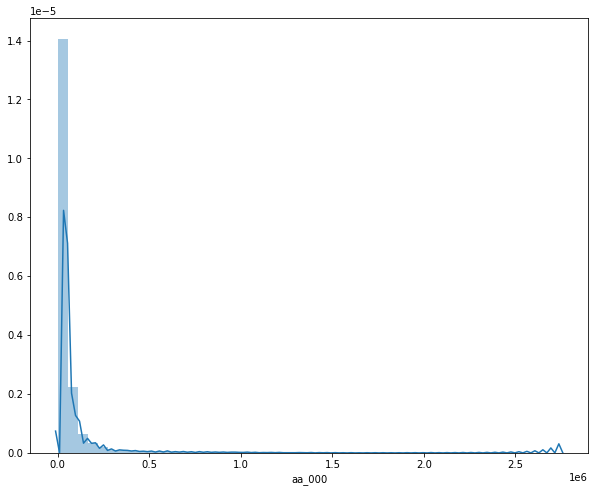

In [ ]:
plt.figure(figsize=(10,8))
sn.distplot(train_df['aa_000'].dropna());

#### How columns values are distributed across both the classes

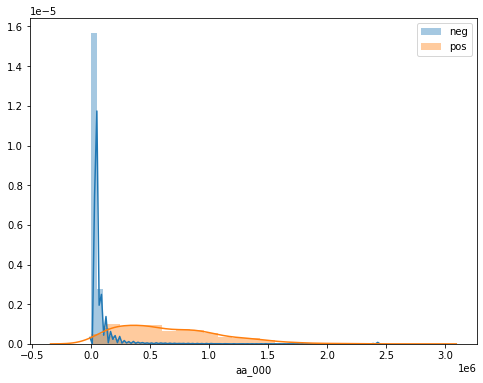

In [ ]:
plt.figure(figsize=(8,6))
sn.distplot(X_train[train_df['class'] == 'neg']['aa_000'].dropna(), label = 'neg');
sn.distplot(X_train[train_df['class'] == 'pos']['aa_000'].dropna(), label = 'pos');
plt.legend()

### Participant Exercise: 1

- Explore three other variables and verify the distribution of the variables across both the classes

### Are there any missing values

In [ ]:
columns_names = X_train.columns
percent_missing = X_train.isnull().sum() * 100 / len(X_train)
missing_value_df = pd.DataFrame({'column_name': columns_names,
                                 'percent_missing': percent_missing})

In [ ]:
missing_value_df.sort_values('percent_missing', ascending = False)

,column_name,percent_missing
br_000,br_000,82.106667
bq_000,bq_000,81.203333
bp_000,bp_000,79.566667
bo_000,bo_000,77.221667
cr_000,cr_000,77.215000
...,...,...
cj_000,cj_000,0.563333
ci_000,ci_000,0.563333
ck_000,ck_000,0.563333
bt_000,bt_000,0.278333


### Dealing with missing values

The missing values can be imputed from values available from other rows/records.

What if majority of the values are missing in a column? A column can be imputed if the less than 20% of values are missing.

We can skip the variables that have more than 20% percent missing values.

### Participant Exercise : 2

- Find Missing percent across both the classes

In [ ]:
neg_class = X_train[train_df['class'] == 'neg']
pos_class = X_train[train_df['class'] == 'pos']

missing_value_df['neg_missing'] = neg_class.isnull().sum() * 100 / len(neg_class)
missing_value_df['pos_missing'] = pos_class.isnull().sum() * 100 / len(pos_class)

In [ ]:
missing_value_df

,column_name,percent_missing,neg_missing,pos_missing
aa_000,aa_000,0.000000,0.000000,0.0
ab_000,ab_000,77.215000,77.216949,77.1
ac_000,ac_000,5.558333,4.869492,46.2
ad_000,ad_000,24.768333,24.094915,64.5
ae_000,ae_000,4.166667,3.659322,34.1
...,...,...,...,...
ee_007,ee_007,1.118333,1.128814,0.5
ee_008,ee_008,1.118333,1.128814,0.5
ee_009,ee_009,1.118333,1.128814,0.5
ef_000,ef_000,4.540000,3.977966,37.7


### Removing the variables that have higher percentage of missing values

In [ ]:
X_features = missing_value_df[missing_value_df.percent_missing < 20.0]['column_name']

In [ ]:
len(X_features)

146

In [ ]:
X_train_v2 = X_train[X_features]

### Imputing missing values

In [ ]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan,
                    strategy='mean')

imp.fit(X_train_v2)

SimpleImputer()

In [ ]:
X_train_v2 = imp.transform(X_train_v2)

In [ ]:
X_train_v2 = pd.DataFrame(X_train_v2)

In [ ]:
percent_missing = X_train_v2.isnull().sum() * 100 / len(X_train)

In [ ]:
percent_missing

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
141    0.0
142    0.0
143    0.0
144    0.0
145    0.0
Length: 146, dtype: float64

In [ ]:
X_train_v2.columns = X_features

In [ ]:
X_train_v2.head(5)

column_name,aa_000,ac_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698.0,2.130706e+09,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,1432864.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,653294.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040.0,2.280000e+02,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,370592.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12.0,7.000000e+01,0.0,10.0,0.0,0.0,0.0,318.0,2212.0,3232.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874.0,1.368000e+03,0.0,0.0,0.0,0.0,0.0,0.0,43752.0,1966618.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


### Oversampling and undersampling

A case of imbalanced representation of both classes.

In [ ]:
from sklearn.utils import resample

In [ ]:
# Separate the case of yes-subscribes and no-subscribes
scania_neg = X_train_v2[train_df['class'] == 'neg']
scania_pos = X_train_v2[train_df['class'] == 'pos']

In [ ]:
scania_pos.shape

(1000, 146)

In [ ]:
scania_neg.shape

(59000, 146)

In [ ]:
##Upsample the yes-subscribed cases.
scania_pos_upsampled = resample(scania_pos, 
                                replace=True,     # sample with replacement
                                n_samples=10000) 

##Upsample the yes-subscribed cases.
scania_neg_downsampled = resample(scania_neg, 
                                  replace=False,     # sample without replacement
                                  n_samples=10000) 

# Combine majority class with upsampled minority class
X_train_v3 = pd.concat([scania_pos_upsampled, scania_neg_downsampled])

In [ ]:
X_train_v3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 58936 to 42955
Columns: 146 entries, aa_000 to eg_000
dtypes: float64(146)
memory usage: 22.4 MB


### Create Y Labels

In [ ]:
y_labels = [1] * 10000 + [0] * 10000

In [ ]:
X_train_v3['class'] = y_labels

In [ ]:
from sklearn.utils import shuffle
X_train_v4 = shuffle(X_train_v3)

### Create Test Set

In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1_IhpNCJTAeiiaGa0MMRmluKKv9-eKMwk" -O test.csv

--2022-03-18 19:42:27--  https://drive.google.com/uc?export=download&id=1_IhpNCJTAeiiaGa0MMRmluKKv9-eKMwk
Resolving drive.google.com (drive.google.com)... 172.217.163.174, 2404:6800:4009:81f::200e
Connecting to drive.google.com (drive.google.com)|172.217.163.174|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-44-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/842lk843gtf8ca1615gtih39thnvj1ft/1647612675000/03885802779803335284/*/1_IhpNCJTAeiiaGa0MMRmluKKv9-eKMwk?e=download [following]
--2022-03-18 19:42:27--  https://doc-14-44-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/842lk843gtf8ca1615gtih39thnvj1ft/1647612675000/03885802779803335284/*/1_IhpNCJTAeiiaGa0MMRmluKKv9-eKMwk?e=download
Resolving doc-14-44-docs.googleusercontent.com (doc-14-44-docs.googleusercontent.com)... 142.250.192.97, 2404:6800:4007:82d::2001
Connecting to doc-14-44-docs.googleusercontent.com (doc-14-44-docs.google

In [ ]:
test_df = pd.read_csv('test.csv', skiprows=20)

In [ ]:
X_test = test_df.iloc[:,1:]

In [ ]:
X_test = X_test.apply(pd.to_numeric, 
                      errors='coerce', 
                      axis=0)

In [ ]:
X_test_v1 = imp.transform(X_test[X_features])

In [ ]:
X_test_v1 = pd.DataFrame(X_test_v1)

In [ ]:
X_test_v1.columns = X_features

In [ ]:
len(X_test_v1)

16000

In [ ]:
len(test_df)

16000

In [ ]:
test_df['class'].value_counts()

neg    15625
pos      375
Name: class, dtype: int64

In [ ]:
labels_dict = {'neg': 0, 'pos': 1}
y_test = test_df['class'].map(labels_dict)

In [ ]:
y_test.value_counts()

0    15625
1      375
Name: class, dtype: int64

### Participant Exercise: 3

- Build a Decision tree model 
- predict on the test set
- Build confusion matrix and measure recall score
- Find the best model parameters

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree_v1 = DecisionTreeClassifier(max_depth = 10)

In [ ]:
tree_v1.fit(X_train_v4[X_features], X_train_v4['class'])

DecisionTreeClassifier(max_depth=10)

In [ ]:
tree_pred_v1 = tree_v1.predict(X_test_v1)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm_v1 = confusion_matrix(y_test, tree_pred_v1, labels = [1, 0])

In [ ]:
cm_v1

array([[  333,    42],
       [  429, 15196]])

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

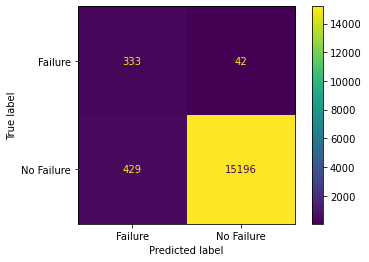

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, tree_pred_v1, labels = [1,0], display_labels = ['Failure', 'No Failure']);

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
recall_score(y_test, tree_pred_v1)

0.888

## Selecting Features using Feature Importance

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=6)

In [ ]:
rf_clf.fit(X_train_v4[X_features], X_train_v4['class']) 

RandomForestClassifier(max_depth=6)

### Participant Exercise: 5

- Predict on the test data
- Create a confusion matrix
- Calculate the recall score

In [ ]:
features_df = pd.DataFrame({'feature': X_features,
                            'importance': np.round(rf_clf.feature_importances_, 3) })

In [ ]:
features_df = features_df.sort_values('importance', 
                                      ascending = False)

In [ ]:
features_df

,feature,importance
ci_000,ci_000,0.109
ck_000,ck_000,0.066
aa_000,aa_000,0.065
bt_000,bt_000,0.065
bu_000,bu_000,0.049
...,...,...
ay_009,ay_009,0.000
cn_007,cn_007,0.000
cn_006,cn_006,0.000
az_004,az_004,0.000


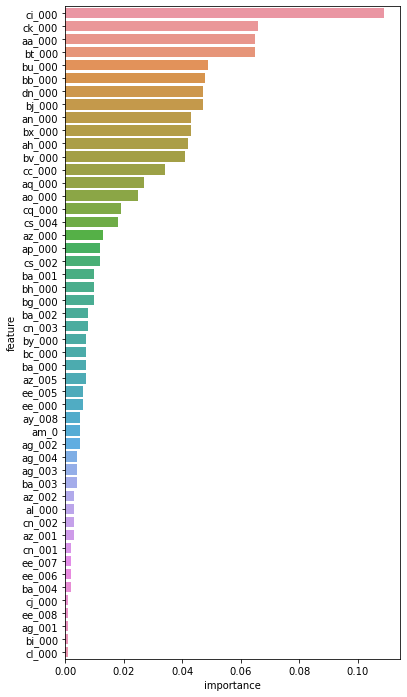

In [ ]:
plt.figure(figsize=(6,12))
sn.barplot(y = 'feature', 
           x = 'importance', 
           data = features_df[0:50])

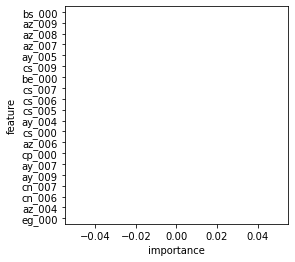

In [ ]:
plt.figure(figsize=(4,4))
sn.barplot(y = 'feature', 
           x = 'importance', 
           data = features_df[-20:])

### Exploring the important features

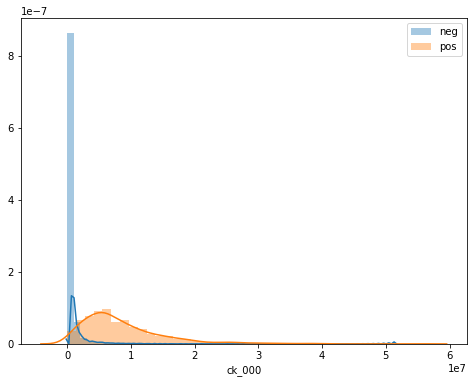

In [ ]:
plt.figure(figsize=(8,6))
sn.distplot(X_train[train_df['class'] == 'neg']['ck_000'].dropna(), label = 'neg');
sn.distplot(X_train[train_df['class'] == 'pos']['ck_000'].dropna(), label = 'pos');
plt.legend()

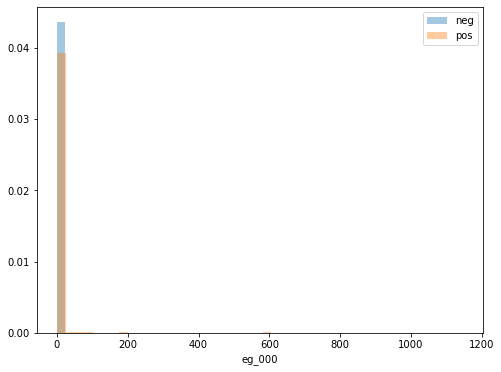

In [ ]:
plt.figure(figsize=(8,6))
sn.distplot(X_train[train_df['class'] == 'neg']['eg_000'].dropna(), label = 'neg');
sn.distplot(X_train[train_df['class'] == 'pos']['eg_000'].dropna(), label = 'pos');
plt.legend()

### Participant Exercise: 5

- Explore the distribution two more important and two not-important variables and note down the observations.
- Find out how many variables should be chosen for the final model

### Selecting the important variables

In [ ]:
features_df['cum_sum'] = features_df.importance.cumsum()

In [ ]:
features_df

,feature,importance,cum_sum
ci_000,ci_000,0.109,0.109
ck_000,ck_000,0.066,0.175
aa_000,aa_000,0.065,0.240
bt_000,bt_000,0.065,0.305
bu_000,bu_000,0.049,0.354
...,...,...,...
ay_009,ay_009,0.000,0.989
cn_007,cn_007,0.000,0.989
cn_006,cn_006,0.000,0.989
az_004,az_004,0.000,0.989


In [ ]:
X_selected_features = features_df[features_df.cum_sum < 0.90]['feature']

In [ ]:
len(X_selected_features)

29

### Build a Random Forest Model

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=6)

rf_clf.fit(X_train_v4[X_selected_features], X_train_v4['class']) 

RandomForestClassifier(max_depth=6)

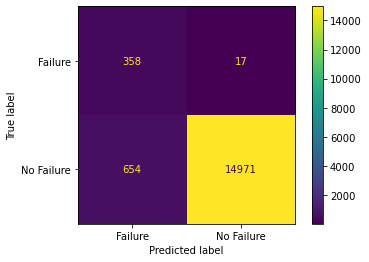

In [ ]:
rf_pred_v1 = rf_clf.predict(X_test_v1[X_selected_features])
cm_v1 = confusion_matrix(y_test, rf_pred_v1, labels = [1, 0])
ConfusionMatrixDisplay.from_predictions(y_test, rf_pred_v1, labels = [1,0], display_labels = ['Failure', 'No Failure']);

In [ ]:
recall_score(y_test, rf_pred_v1)

0.9546666666666667

### Hyperparamter tuning to find optimal Model

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
rf_v1 = RandomForestClassifier()

In [ ]:
rf_params = {'n_estimators': [10, 20, 50],
             'max_features': [8, 12],
             'max_depth': [5, 7]}

In [ ]:
rf_grid = GridSearchCV(rf_v1, 
                       rf_params,
                       scoring = 'recall',
                       cv = 10)

In [ ]:
rf_grid.fit(X_train_v4[X_selected_features], 
            X_train_v4['class'])

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 7], 'max_features': [8, 12],
                         'n_estimators': [10, 20, 50]},
             scoring='recall')

In [ ]:
rf_grid.best_score_

0.9848000000000001

In [ ]:
rf_grid.best_params_

{'max_depth': 7, 'max_features': 12, 'n_estimators': 20}

In [ ]:
rf_model_v1 = rf_grid.best_estimator_

### Participant Exercise: 6

- Build confusion matrix and calculate recall score on test set with the best model

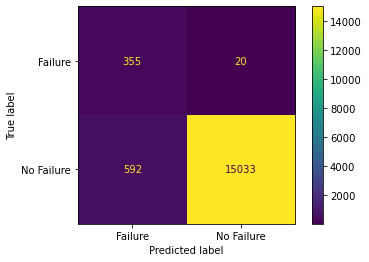

In [ ]:
rf_pred_v1 = rf_model_v1.predict(X_test_v1[X_selected_features])
cm_v1 = confusion_matrix(y_test, rf_pred_v1, labels = [1, 0])
ConfusionMatrixDisplay.from_predictions(y_test, rf_pred_v1, labels = [1,0], display_labels = ['Failure', 'No Failure']);

In [ ]:
rf_pred_prob_v1 = rf_model_v1.predict_proba(X_test_v1[X_selected_features])

In [ ]:
rf_pred_df = pd.DataFrame({'label': y_test,
                           'prob': rf_pred_prob_v1[:,1]})

In [ ]:
rf_pred_df.head(5)

,label,prob
0,0,0.016077
1,0,0.053089
2,0,0.111220
3,0,0.013039
4,0,0.016077


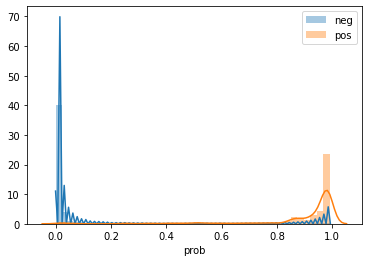

In [ ]:
sn.distplot(rf_pred_df[rf_pred_df.label == 0]['prob'], label = 'neg')
sn.distplot(rf_pred_df[rf_pred_df.label == 1]['prob'], label = 'pos')
plt.legend();

### What happens when the cutoff probability if changed

### Finding cutoff using cost based approach

The total cost of a prediction model the sum of Cost_1 multiplied by the number of Instances with type 1 failure and Cost_2 with the number of instances with type 2 failure, resulting in a Total_cost. In this case Cost_1 refers to the cost that an unnecessary check needs to be done by an mechanic at an workshop, while Cost_2 refer to the cost of missing a faulty truck, which may cause a breakdown. Cost_1 = 10 and Cost_2 = 500, and Total_cost = Cost_1*No_Instances 

In [ ]:
FN_cost = 500.0
FP_cost = 10.0

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
def get_cost( cutoff ):    
    new_pred = rf_pred_df.prob.map(lambda x: 1 if x >= cutoff else 0)
    cm_new = confusion_matrix(rf_pred_df.label, new_pred, labels = [1,0])
    total_cost = FN_cost * cm_new[0][1] + FP_cost * cm_new[1][0]
    return total_cost

In [ ]:
import numpy as np

cutoff_list = list(np.arange(0.0, 0.8, 0.01))
cutoff_costs = [get_cost(x) for x in cutoff_list]

In [ ]:
cutoff_costs_df = pd.DataFrame({'cutoff': cutoff_list,
                                'cost': cutoff_costs})

In [ ]:
cutoff_costs_df.sort_values('cost', ascending=True)[0:5]

,cutoff,cost
24,0.24,11830.0
32,0.32,11970.0
23,0.23,12060.0
25,0.25,12110.0
31,0.31,12110.0


In [ ]:
rf_pred_df['pred_labels'] = rf_pred_df.prob.map(lambda x: 1 if x > 0.25 else 0)

In [ ]:
cm_rf = confusion_matrix(rf_pred_df.label, rf_pred_df.pred_labels, labels = [1,0])

Text(33.0, 0.5, 'Actual')

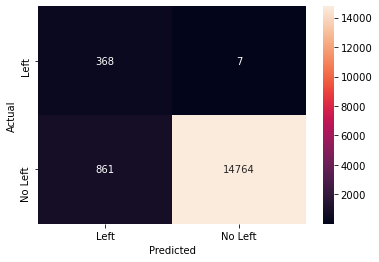

In [ ]:
sn.heatmap(cm_rf,
           fmt='.0f',
           annot = True,
           xticklabels = ['Left', 'No Left'],
           yticklabels = ['Left', 'No Left'])
plt.xlabel('Predicted')
plt.ylabel('Actual')